Convolutional Neural Network (CNN) implementation for Diabetic Retinopathy Detection 
https://www.kaggle.com/c/diabetic-retinopathy-detection/data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 

from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from cv2 import cv2
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

from keras.layers import Dense, Dropout, Flatten, Input 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from numpy import array 

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


I have already downloaded the dataset from Kaggle.
I have noted all the steps to download the database in a seperate file.
Below I am loading a CSV file containing training labels 

In [3]:
df_train = pd.read_csv('/storage/trainLabels.csv')

Lets take a look at all the labels.
'10_left' is a name of the file whereas '0/1/2/3/4' are the labels
'10_left' image of the left eye
'10_right' image of the right eye for the same person

In [5]:
df_train.values

array([['10_left', 0],
       ['10_right', 0],
       ['13_left', 0],
       ...,
       ['44348_right', 0],
       ['44349_left', 0],
       ['44349_right', 1]], dtype=object)

There are 35125 images in the training set, 'level' is the column indicating the labels for its respective images

In [6]:
df_train.tail()

,image,level
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0
35125,44349_right,1


We will use Pandas to convert df_train into a series.
and get_dummies to do one hot encoding (FYI, I am not using one hot encoding during training as of now)

In [7]:
targets_series = pd.Series(df_train['level'])
one_hot = pd.get_dummies(targets_series, sparse = True)

As I said before there are 5 types of labels 0/1/2/3/4, thry are distinguished as below
NDPR - Non Proliferative Diabetic Retinopathy

Class	 Name
0	    Normal	
1	    Mild NPDR
2	    Moderate NPDR
3	    Severe NPDR	
4	    PDR

In [10]:
targets_series[:10]

0    0
1    0
2    0
3    0
4    1
5    2
6    4
7    4
8    0
9    1
Name: level, dtype: int64

In [11]:
one_hot[:10]

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,0,1
8,1,0,0,0,0
9,0,1,0,0,0


In [12]:
one_hot_labels = np.asarray(one_hot)

In [13]:
one_hot_labelsY = np.asarray(targets_series)

Lets take a look at the array containing just the labels

In [14]:
one_hot_labelsY[:10]

array([0, 0, 0, 0, 1, 2, 4, 4, 0, 1])

Some declarations

In [15]:
im_size1 = 786
im_size2 = 786

In [16]:
x_train = []
y_train = []

If you are interested to check all image names

In [17]:
i = 0 
for f, breed in tqdm(df_train.values):
    print(f)


  5%|▌         | 1876/35126 [00:00<00:08, 3869.59it/s]

10_left
10_right
13_left
13_right
15_left
15_right
16_left
16_right
17_left
17_right
19_left
19_right
20_left
20_right
21_left
21_right
22_left
22_right
23_left
23_right
25_left
25_right
30_left
30_right
31_left
31_right
33_left
33_right
36_left
36_right
40_left
40_right
41_left
41_right
42_left
42_right
46_left
46_right
47_left
47_right
49_left
49_right
51_left
51_right
52_left
52_right
54_left
54_right
56_left
56_right
57_left
57_right
58_left
58_right
59_left
59_right
60_left
60_right
62_left
62_right
64_left
64_right
65_left
65_right
66_left
66_right
67_left
67_right
70_left
70_right
72_left
72_right
73_left
73_right
74_left
74_right
75_left
75_right
78_left
78_right
79_left
79_right
81_left
81_right
82_left
82_right
84_left
84_right
95_left
95_right
99_left
99_right
100_left
100_right
102_left
102_right
104_left
104_right
108_left
108_right
111_left
111_right
114_left
114_right
115_left
115_right
117_left
117_right
119_left
119_right
122_left
122_right
125_left
125_right
129_left


 12%|█▏        | 4380/35126 [00:00<00:05, 5915.72it/s]

3103_right
3104_left
3104_right
3106_left
3106_right
3112_left
3112_right
3114_left
3114_right
3116_left
3116_right
3121_left
3121_right
3123_left
3123_right
3124_left
3124_right
3130_left
3130_right
3135_left
3135_right
3139_left
3139_right
3141_left
3141_right
3142_left
3142_right
3144_left
3144_right
3146_left
3146_right
3148_left
3148_right
3149_left
3149_right
3159_left
3159_right
3160_left
3160_right
3163_left
3163_right
3166_left
3166_right
3167_left
3167_right
3170_left
3170_right
3174_left
3174_right
3177_left
3177_right
3185_left
3185_right
3189_left
3189_right
3192_left
3192_right
3194_left
3194_right
3196_left
3196_right
3197_left
3197_right
3202_left
3202_right
3204_left
3204_right
3211_left
3211_right
3212_left
3212_right
3213_left
3213_right
3216_left
3216_right
3220_left
3220_right
3224_left
3224_right
3227_left
3227_right
3228_left
3228_right
3232_left
3232_right
3237_left
3237_right
3241_left
3241_right
3249_left
3249_right
3250_left
3250_right
3251_left
3251_right
32

 21%|██        | 7278/35126 [00:00<00:03, 8322.59it/s]

7396_right
7397_left
7397_right
7398_left
7398_right
7403_left
7403_right
7404_left
7404_right
7405_left
7405_right
7410_left
7410_right
7411_left
7411_right
7415_left
7415_right
7417_left
7417_right
7419_left
7419_right
7425_left
7425_right
7426_left
7426_right
7429_left
7429_right
7430_left
7430_right
7437_left
7437_right
7438_left
7438_right
7439_left
7439_right
7445_left
7445_right
7446_left
7446_right
7448_left
7448_right
7457_left
7457_right
7459_left
7459_right
7460_left
7460_right
7461_left
7461_right
7463_left
7463_right
7464_left
7464_right
7466_left
7466_right
7468_left
7468_right
7470_left
7470_right
7474_left
7474_right
7475_left
7475_right
7481_left
7481_right
7486_left
7486_right
7487_left
7487_right
7492_left
7492_right
7494_left
7494_right
7497_left
7497_right
7502_left
7502_right
7504_left
7504_right
7505_left
7505_right
7506_left
7506_right
7512_left
7512_right
7514_left
7514_right
7515_left
7515_right
7516_left
7516_right
7518_left
7518_right
7520_left
7520_right
75

 29%|██▉       | 10362/35126 [00:00<00:02, 10351.03it/s]

11003_left
11003_right
11005_left
11005_right
11007_left
11007_right
11008_left
11008_right
11010_left
11010_right
11013_left
11013_right
11023_left
11023_right
11026_left
11026_right
11031_left
11031_right
11032_left
11032_right
11035_left
11035_right
11037_left
11037_right
11040_left
11040_right
11041_left
11041_right
11043_left
11043_right
11048_left
11048_right
11049_left
11049_right
11050_left
11050_right
11053_left
11053_right
11054_left
11054_right
11056_left
11056_right
11057_left
11057_right
11058_left
11058_right
11067_left
11067_right
11069_left
11069_right
11072_left
11072_right
11079_left
11079_right
11080_left
11080_right
11083_left
11083_right
11085_left
11085_right
11087_left
11087_right
11089_left
11089_right
11091_left
11091_right
11095_left
11095_right
11097_left
11097_right
11098_left
11098_right
11099_left
11099_right
11101_left
11101_right
11106_left
11106_right
11113_left
11113_right
11114_left
11114_right
11115_left
11115_right
11117_left
11117_right
11119_left


 36%|███▋      | 12787/35126 [00:01<00:02, 10130.03it/s]


13662_left
13662_right
13664_left
13664_right
13667_left
13667_right
13668_left
13668_right
13669_left
13669_right
13670_left
13670_right
13672_left
13672_right
13673_left
13673_right
13675_left
13675_right
13678_left
13678_right
13680_left
13680_right
13683_left
13683_right
13684_left
13684_right
13685_left
13685_right
13688_left
13688_right
13691_left
13691_right
13692_left
13692_right
13693_left
13693_right
13697_left
13697_right
13701_left
13701_right
13704_left
13704_right
13705_left
13705_right
13708_left
13708_right
13713_left
13713_right
13714_left
13714_right
13716_left
13716_right
13721_left
13721_right
13730_left
13730_right
13731_left
13731_right
13733_left
13733_right
13736_left
13736_right
13738_left
13738_right
13739_left
13739_right
13740_left
13740_right
13742_left
13742_right
13743_left
13743_right
13745_left
13745_right
13746_left
13746_right
13748_left
13748_right
13749_left
13749_right
13751_left
13751_right
13753_left
13753_right
13754_left
13754_right
13757_left

 44%|████▍     | 15610/35126 [00:01<00:01, 11442.85it/s]

16327_right
16334_left
16334_right
16335_left
16335_right
16336_left
16336_right
16340_left
16340_right
16341_left
16341_right
16343_left
16343_right
16350_left
16350_right
16351_left
16351_right
16359_left
16359_right
16360_left
16360_right
16365_left
16365_right
16366_left
16366_right
16369_left
16369_right
16370_left
16370_right
16374_left
16374_right
16375_left
16375_right
16377_left
16377_right
16379_left
16379_right
16381_left
16381_right
16384_left
16384_right
16385_left
16385_right
16386_left
16386_right
16388_left
16388_right
16389_left
16389_right
16390_left
16390_right
16391_left
16391_right
16392_left
16392_right
16393_left
16393_right
16395_left
16395_right
16398_left
16398_right
16401_left
16401_right
16403_left
16403_right
16405_left
16405_right
16407_left
16407_right
16408_left
16408_right
16410_left
16410_right
16412_left
16412_right
16413_left
16413_right
16414_left
16414_right
16416_left
16416_right
16417_left
16417_right
16418_left
16418_right
16419_left
16419_right

 48%|████▊     | 16840/35126 [00:01<00:01, 10459.43it/s]

19754_left
19754_right
19755_left
19755_right
19762_left
19762_right
19766_left
19766_right
19770_left
19770_right
19771_left
19771_right
19773_left
19773_right
19778_left
19778_right
19782_left
19782_right
19784_left
19784_right
19788_left
19788_right
19789_left
19789_right
19792_left
19792_right
19793_left
19793_right
19800_left
19800_right
19802_left
19802_right
19803_left
19803_right
19806_left
19806_right
19810_left
19810_right
19811_left
19811_right
19812_left
19812_right
19813_left
19813_right
19815_left
19815_right
19821_left
19821_right
19823_left
19823_right
19828_left
19828_right
19830_left
19830_right
19839_left
19839_right
19840_left
19840_right
19843_left
19843_right
19849_left
19849_right
19850_left
19850_right
19852_left
19852_right
19854_left
19854_right
19858_left
19858_right
19859_left
19859_right
19864_left
19864_right
19865_left
19865_right
19867_left
19867_right
19870_left
19870_right
19874_left
19874_right
19876_left
19876_right
19877_left
19877_right
19878_left


 56%|█████▌    | 19737/35126 [00:01<00:01, 10511.26it/s]

23106_left
23106_right
23109_left
23109_right
23110_left
23110_right
23111_left
23111_right
23114_left
23114_right
23118_left
23118_right
23120_left
23120_right
23121_left
23121_right
23123_left
23123_right
23124_left
23124_right
23129_left
23129_right
23130_left
23130_right
23132_left
23132_right
23133_left
23133_right
23135_left
23135_right
23139_left
23139_right
23141_left
23141_right
23145_left
23145_right
23146_left
23146_right
23147_left
23147_right
23148_left
23148_right
23156_left
23156_right
23157_left
23157_right
23160_left
23160_right
23162_left
23162_right
23163_left
23163_right
23165_left
23165_right
23167_left
23167_right
23170_left
23170_right
23171_left
23171_right
23177_left
23177_right
23178_left
23178_right
23181_left
23181_right
23182_left
23182_right
23183_left
23183_right
23188_left
23188_right
23190_left
23190_right
23193_left
23193_right
23196_left
23196_right
23201_left
23201_right
23210_left
23210_right
23211_left
23211_right
23213_left
23213_right
23216_left


 65%|██████▌   | 22954/35126 [00:01<00:00, 12485.07it/s]

25149_right
25153_left
25153_right
25154_left
25154_right
25156_left
25156_right
25158_left
25158_right
25159_left
25159_right
25160_left
25160_right
25161_left
25161_right
25162_left
25162_right
25163_left
25163_right
25165_left
25165_right
25166_left
25166_right
25167_left
25167_right
25169_left
25169_right
25171_left
25171_right
25172_left
25172_right
25175_left
25175_right
25181_left
25181_right
25188_left
25188_right
25189_left
25189_right
25197_left
25197_right
25198_left
25198_right
25203_left
25203_right
25205_left
25205_right
25207_left
25207_right
25209_left
25209_right
25210_left
25210_right
25212_left
25212_right
25217_left
25217_right
25221_left
25221_right
25222_left
25222_right
25229_left
25229_right
25233_left
25233_right
25236_left
25236_right
25238_left
25238_right
25241_left
25241_right
25242_left
25242_right
25249_left
25249_right
25251_left
25251_right
25258_left
25258_right
25259_left
25259_right
25260_left
25260_right
25261_left
25261_right
25263_left
25263_right

 75%|███████▍  | 26193/35126 [00:02<00:00, 14185.87it/s]


29516_left
29516_right
29518_left
29518_right
29524_left
29524_right
29526_left
29526_right
29530_left
29530_right
29535_left
29535_right
29537_left
29537_right
29542_left
29542_right
29549_left
29549_right
29553_left
29553_right
29557_left
29557_right
29559_left
29559_right
29560_left
29560_right
29562_left
29562_right
29565_left
29565_right
29569_left
29569_right
29572_left
29572_right
29574_left
29574_right
29577_left
29577_right
29579_left
29579_right
29588_left
29588_right
29589_left
29589_right
29592_left
29592_right
29594_left
29594_right
29595_left
29595_right
29596_left
29596_right
29599_left
29599_right
29601_left
29601_right
29603_left
29603_right
29604_left
29604_right
29605_left
29605_right
29608_left
29608_right
29611_left
29611_right
29612_left
29612_right
29615_left
29615_right
29618_left
29618_right
29619_left
29619_right
29620_left
29620_right
29621_left
29621_right
29622_left
29622_right
29623_left
29623_right
29625_left
29625_right
29627_left
29627_right
29628_left

 85%|████████▍ | 29694/35126 [00:02<00:00, 15333.14it/s]

33945_right
33946_left
33946_right
33951_left
33951_right
33953_left
33953_right
33955_left
33955_right
33956_left
33956_right
33959_left
33959_right
33960_left
33960_right
33963_left
33963_right
33966_left
33966_right
33970_left
33970_right
33971_left
33971_right
33973_left
33973_right
33974_left
33974_right
33975_left
33975_right
33976_left
33976_right
33978_left
33978_right
33983_left
33983_right
33987_left
33987_right
33990_left
33990_right
33991_left
33991_right
33995_left
33995_right
33996_left
33996_right
34003_left
34003_right
34004_left
34004_right
34006_left
34006_right
34008_left
34008_right
34011_left
34011_right
34012_left
34012_right
34013_left
34013_right
34021_left
34021_right
34022_left
34022_right
34023_left
34023_right
34024_left
34024_right
34026_left
34026_right
34027_left
34027_right
34029_left
34029_right
34032_left
34032_right
34035_left
34035_right
34038_left
34038_right
34041_left
34041_right
34043_left
34043_right
34046_left
34046_right
34049_left
34049_right

 89%|████████▉ | 31292/35126 [00:02<00:00, 14125.53it/s]


38363_right
38364_left
38364_right
38365_left
38365_right
38367_left
38367_right
38370_left
38370_right
38372_left
38372_right
38373_left
38373_right
38374_left
38374_right
38375_left
38375_right
38379_left
38379_right
38385_left
38385_right
38386_left
38386_right
38389_left
38389_right
38391_left
38391_right
38392_left
38392_right
38397_left
38397_right
38399_left
38399_right
38400_left
38400_right
38401_left
38401_right
38402_left
38402_right
38404_left
38404_right
38407_left
38407_right
38408_left
38408_right
38409_left
38409_right
38410_left
38410_right
38413_left
38413_right
38417_left
38417_right
38419_left
38419_right
38420_left
38420_right
38421_left
38421_right
38422_left
38422_right
38423_left
38423_right
38426_left
38426_right
38429_left
38429_right
38431_left
38431_right
38434_left
38434_right
38437_left
38437_right
38439_left
38439_right
38446_left
38446_right
38447_left
38447_right
38454_left
38454_right
38457_left
38457_right
38458_left
38458_right
38459_left
38459_righ

 97%|█████████▋| 34067/35126 [00:02<00:00, 11964.56it/s]


40817_left
40817_right
40819_left
40819_right
40821_left
40821_right
40823_left
40823_right
40827_left
40827_right
40831_left
40831_right
40832_left
40832_right
40833_left
40833_right
40836_left
40836_right
40837_left
40837_right
40838_left
40838_right
40839_left
40839_right
40840_left
40840_right
40841_left
40841_right
40845_left
40845_right
40847_left
40847_right
40848_left
40848_right
40853_left
40853_right
40855_left
40855_right
40857_left
40857_right
40858_left
40858_right
40860_left
40860_right
40863_left
40863_right
40864_left
40864_right
40866_left
40866_right
40868_left
40868_right
40871_left
40871_right
40873_left
40873_right
40874_left
40874_right
40875_left
40875_right
40876_left
40876_right
40877_left
40877_right
40879_left
40879_right
40885_left
40885_right
40886_left
40886_right
40887_left
40887_right
40888_left
40888_right
40889_left
40889_right
40890_left
40890_right
40891_left
40891_right
40893_left
40893_right
40894_left
40894_right
40897_left
40897_right
40900_left

100%|██████████| 35126/35126 [00:02<00:00, 12518.97it/s]


43797_left
43797_right
43798_left
43798_right
43802_left
43802_right
43803_left
43803_right
43805_left
43805_right
43806_left
43806_right
43810_left
43810_right
43813_left
43813_right
43814_left
43814_right
43815_left
43815_right
43816_left
43816_right
43822_left
43822_right
43826_left
43826_right
43827_left
43827_right
43829_left
43829_right
43830_left
43830_right
43831_left
43831_right
43832_left
43832_right
43833_left
43833_right
43835_left
43835_right
43836_left
43836_right
43839_left
43839_right
43840_left
43840_right
43852_left
43852_right
43853_left
43853_right
43854_left
43854_right
43861_left
43861_right
43862_left
43862_right
43863_left
43863_right
43867_left
43867_right
43871_left
43871_right
43872_left
43872_right
43873_left
43873_right
43887_left
43887_right
43890_left
43890_right
43892_left
43892_right
43893_left
43893_right
43894_left
43894_right
43897_left
43897_right
43898_left
43898_right
43899_left
43899_right
43901_left
43901_right
43902_left
43902_right
43903_left

I am creating a sub set of 1000 images out of total 35125 images

In [22]:
df_test = df_train[:1000]

IF you plan to run this code on all 35125 images then replace df_test with df_train.
This code sneppet will load all the images and labels into a numpy array.
You can also load images using OpenCV, I will mention the code OpenCV code in comments

"""
i = 0 
for f, breed in tqdm(df_train.values):
    if type(cv2.imread('/storage/train/{}.jpeg'.format(f)))==type(None):
        continue
    else:
        img = cv2.imread('/storage/train/{}.jpeg'.format(f))
        label = one_hot_labels[i]
        x_train.append(cv2.resize(img, (im_size1, im_size2)))
        y_train.append(label)
        i += 1
np.save('x_train2',x_train)
np.save('y_train2',y_train)
print('Done')
"""

In [23]:
i=0
for f, breed in tqdm(df_test.values):
    try:
        img = image.load_img(('/storage/train/{}.jpeg'.format(f)), target_size=(786, 786))
        arr = image.img_to_array(img)
        label = one_hot_labelsY[i]
        x_train.append(arr)
        y_train.append(label)
        i += 1 
    except:
        pass

100%|██████████| 1000/1000 [01:43<00:00,  7.06it/s]


Lets just verify one of the images from the numpy array

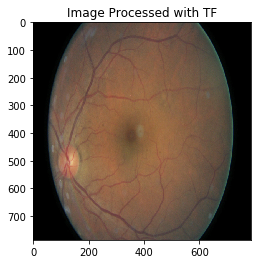

In [26]:
plt.imshow(x_train[681]/255)
plt.show()

Its important to split the whole dataset into training and validation dataset apart from testing dataset which we have seperately.

In [28]:
x_valid = []
y_valid = []

In [29]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

Now we will define the model >>
The model has 2 convolutional leyers, 2 max pooling layes, image flattening layer and a dence layer
Models in Keras/TF come in 2 forms - Sequential (model = Sequential()) or using Funtional API
Below code is using Funtional API which is usually used for complex models, i will leave the light weight Sequential() model in comments

In [32]:
visible = Input(shape=(786,786,3))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

Instructions for updating:
Colocations handled automatically by placer.


If you are planning to run less complex model run below lines, i will suggess to use a trasfer learning technique if you are planning to use below model for better results

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(786, 786, 3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

There are variety of optimizers available >> https://keras.io/optimizers/
More about loss functions >> https://keras.io/losses/
Metrics >> https://keras.io/metrics/

In [33]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Lets convert the array into a numpy array, this might take some time

In [34]:
y_train_raw = np.array(Y_train)

In [35]:
x_train_raw = np.array(X_train)

This is how the layers are stack on top of each other

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 786, 786, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 783, 783, 32)      1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 391, 391, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 388, 388, 16)      8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 194, 194, 16)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 602176)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6021770   
__________

This command will actually train the model.
Even with less number of images, you might come accross 'Insufficient memory error' or 'Kernel restart error'

In [ ]:
model.fit(x_train_raw, y_train_raw, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5


In [ ]:
x_valid_raw = np.array(X_valid)

In [ ]:
y_valid_raw = np.array(Y_valid)

Once the model is trained, we need to evaluate the performance of the model with all validation dataset.

In [ ]:
test_loss, test_acc = model.evaluate(x_valid_raw, y_valid_raw)

In [ ]:
test_loss

In [ ]:
test_acc